In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=6.379447879944159 et b_1=5.032667512512536


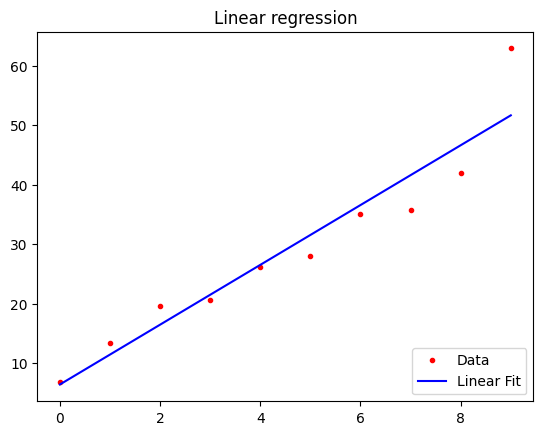

In [2]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



b_0=10.357197990513367 et b_1=4.27904531056408


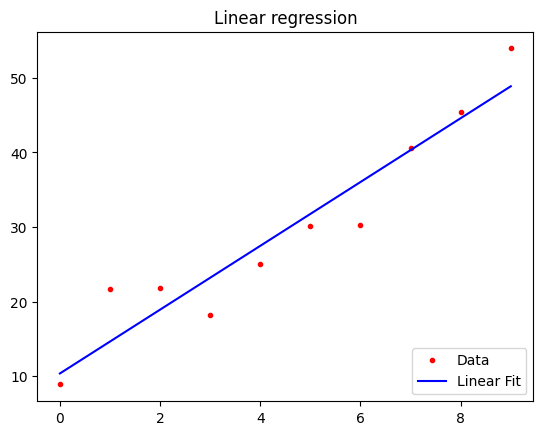

In [3]:
x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()

La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  $\hat{y_{(i)j}}$ est l'estimation de $y_j$ à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des $e_{(i)j}$ est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [14]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [ ]:
def profil_residuel(x, y, i):

    x_del_i = np.delete(x,i)
    y_del_i = np.delete(y,i)
    
    lr = LinearRegression()
    lr.fit(x_del_i[:, np.newaxis], y_del_i)

    y_pred = lr.predict(x[:, np.newaxis])

    e = y - y_pred

    return e

In [27]:
for i in range(10):
    print(profil_residuel(x, y, i))

[-0.96958159  4.97043421  1.50146658 -0.52489982 -2.8453967  -0.73510183
 -4.37839223 -5.60276605 -5.61624117 13.23089701]
[ 1.39858838  6.98920613  3.17084046  0.79507602 -1.87481891 -0.11392208
 -4.10661052 -5.68038238 -6.04325555 12.45448458]
[-0.13834863  5.68515441  2.09967403 -0.04320513 -2.48021477 -0.48643264
 -4.2462358  -5.58712237 -5.71711024 13.01351518]
[-0.70726278  5.18712951  1.67253837 -0.39945155 -2.76557194 -0.70090058
 -4.38981449 -5.65981182 -5.71891046 13.0826042 ]
[-1.0208643   4.88465709  1.38119506 -0.67966576 -3.03465705 -0.95885658
 -4.63664138 -5.89550961 -5.94347914 12.86916463]
[-0.68852064  5.19411844  1.66777409 -0.41596903 -2.79384263 -0.74092448
 -4.4415916  -5.72334213 -5.79419398 12.99556748]
[-0.72548446  5.07079583  1.4580927  -0.71200922 -3.17624161 -1.20968224
 -4.99670814 -6.36481747 -6.5220281  12.18137457]
[-0.38589889  5.29395036  1.56481619 -0.72171676 -3.30238019 -1.45225186
 -5.35570881 -6.84024917 -7.11389084 11.47308079]
[ 0.05541134  5.

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [31]:
def cook(x, y, i):

    n = x.shape[0]

    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)
    y_pred = lr.predict(x[:, np.newaxis])

    x_del_i = np.delete(x,i)
    y_del_i = np.delete(y,i)
    
    lr = LinearRegression()
    lr.fit(x_del_i[:, np.newaxis], y_del_i)

    y_pred_i = lr.predict(x[:, np.newaxis])

    s2 = np.sum((y - y_pred)**2) / n-1
    
    return np.sum((y_pred_i - y_pred)**2) / 2*s2

#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [33]:
for i in range(10):
    print(cook(x, y, i))

4.605833014632561
172.14886557909912
10.989207176286454
0.2880130209811978
13.456520161387264
0.8021607665779601
45.06629664898324
116.62897315635102
203.04422192803352
1959.4325046179918


## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2) $

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...